# Complexity Ananalysis for Segmentation Models

Times were calculated separately by running on command line under same conditions. 

The segmentation techniques are further analyzed by feeding images of varying sizes to understand the increase in time with the increase in image size, thus estimating the time complexity of the segmentation techniques. The computing machine used has Core i5-8500H CPU and GTX 1050Ti GPU for processing. The computing machine is the same for all the segmentation techniques.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

C:\Users\erudi\anaconda3\envs\torch\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\erudi\anaconda3\envs\torch\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\erudi\anaconda3\envs\torch\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df = pd.read_csv('./time.csv')

In [3]:
df

,image_size,watershed,grabcut,u2net
0,500x375,0.065460,2.634948,9.197003
1,1000x750,0.163563,12.493830,9.413070
2,1500x1125,0.326129,19.988982,9.526903
3,2000x1500,0.534568,119.670296,10.081352
4,2500x1875,0.826793,177.866116,11.760932
5,3000x2250,1.199826,260.047588,11.913224
6,3500x2625,1.624656,498.527443,13.155739
7,4000x3000,2.113347,2351.711065,15.299824


In [4]:
times = df.iloc[:,1:]

In [5]:
scaler = MinMaxScaler()

In [6]:
normalized_times = scaler.fit_transform(times)

In [7]:
df_norm = df.copy()

In [8]:
df_norm.iloc[:,1:] = normalized_times

In [9]:
df_norm

,image_size,watershed,grabcut,u2net
0,500x375,0.000000,0.000000,0.000000
1,1000x750,0.047905,0.004197,0.035404
2,1500x1125,0.127287,0.007388,0.054057
3,2000x1500,0.229069,0.049822,0.144908
4,2500x1875,0.371765,0.074596,0.420122
5,3000x2250,0.553920,0.109580,0.445076
6,3500x2625,0.761368,0.211101,0.648673
7,4000x3000,1.000000,1.000000,1.000000


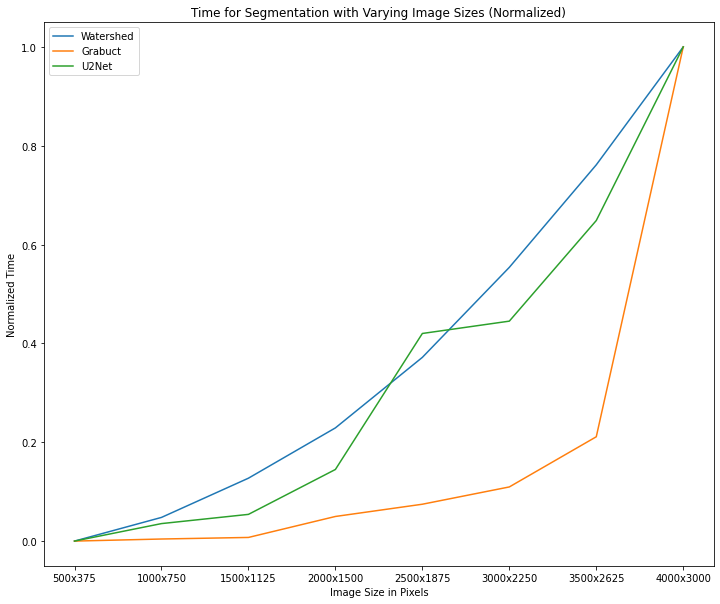

In [10]:
plt.figure(figsize=(12,10))
plt.plot(df_norm.image_size, df_norm.watershed, label='Watershed')
plt.plot(df_norm.image_size, df_norm.grabcut, label='Grabuct')
plt.plot(df_norm.image_size, df_norm.u2net, label='U2Net')
plt.title("Time for Segmentation with Varying Image Sizes (Normalized)")
plt.xlabel("Image Size in Pixels")
plt.ylabel("Normalized Time")
plt.legend()
plt.savefig('time_normalized.png')
plt.show()

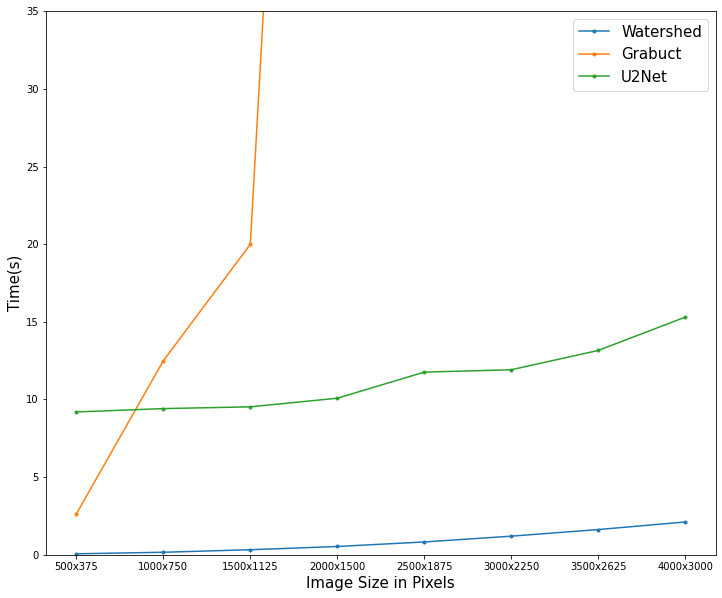

In [21]:
plt.figure(figsize=(12,10))
plt.plot(df.image_size, df.watershed, label='Watershed', marker='.')
plt.plot(df.image_size, df.grabcut, label='Grabuct', marker='.')
plt.plot(df.image_size, df.u2net, label='U2Net', marker='.')
plt.ylim(0,35)
#plt.title("Time for Segmentation with Varying Image Sizes")
plt.xlabel("Image Size in Pixels", size=15)
plt.ylabel("Time(s)", size=15)
plt.legend(prop={'size': 15})
plt.savefig('time.png')
plt.show()

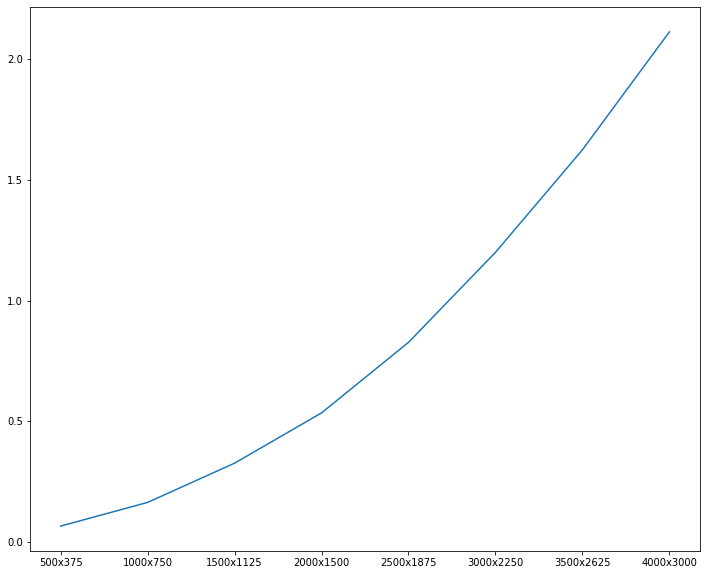

In [12]:
plt.figure(figsize=(12,10))
plt.plot(df.image_size, df.watershed, label='Watershed')